In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
U = np.random.rand
f = np.exp
a, b = 0, 10

In [38]:
N   = 10**4
V   = b - a
Σf  = 0
Σf2 = 0
for i in range(N):
    x    = U()*(b-a) + a
    Σf  += f(x)
    Σf2 += f(x)*f(x)

#     w    = f(x)
#     Σf  += w
#     Σf2 += w*w
    
μf  = Σf/N
σf2 = Σf2/N - μf**2
sf2 = σf2*N/(N-1)
sf  = sf2**0.5

I  = V*μf
δI = V*sf/N**0.5

# print(I, δI)
print("I = %2.3f, δI = %2.3f, δI/I = %2.3f"%(I, δI, δI/I))    

I = 22438.211, δI = 446.536, δI/I = 0.020


In [46]:
exp_I = f(b) - 1
exp_σf = ((1/20)*(f(20) - f(0)) - (0.1*(f(b) - 1))**2)**0.5
exp_δI = V*exp_σf/N**0.5
print("exp_I = %2.3f, exp_δI = %2.3f, exp_δI/I = %2.3f"%(exp_I, exp_δI, exp_δI/exp_I))    

exp_I = 22025.466, exp_δI = 440.534, exp_δI/I = 0.020


In [45]:
exp_σf = ((1/20)*(f(20) - f(0)) - (0.1*(f(b) - 1))**2)**0.5

4405.343151867685

In [50]:
def integrate(f, a, b, N = 10**4):
    V   = b - a
    Σf  = 0
    Σf2 = 0
    for i in range(N):
        x    = U()*(b-a) + a
        Σf  += f(x)
        Σf2 += f(x)*f(x)

    #     w    = f(x)
    #     Σf  += w
    #     Σf2 += w*w

    μf  = Σf/N
    σf2 = Σf2/N - μf**2
    sf2 = σf2*N/(N-1)
    sf  = sf2**0.5

    I  = V*μf
    δI = V*sf/N**0.5

    # print(I, δI)
    print("I = %2.3f, δI = %2.3f, δI/I = %2.3f"%(I, δI, δI/I))    

In [55]:
def g(x): return x**2 - np.sin(x)

integrate(g, 1, 4, N =10**4)

I = 19.986, δI = 0.148, δI/I = 0.007


In [57]:
# brute force approach of the uncertainty estimation *** 

def integrate(f, a, b, N = 10**4):
    V   = b - a
    Σf  = 0
    for i in range(N):
        x    = U()*(b-a) + a
        Σf  += f(x)

    μf  = Σf/N

    I  = V*μf
    return I


In [64]:
integrate(np.exp, 0, 10, N=10**4)

22036.378773682947

In [76]:
integrals = [integrate(np.exp, 0, 10, N=10**4) for i in range(4*800)]
integrals = np.array(integrals)
print(integrals.mean(), integrals.std())

22022.839555866503 435.53273539573127


(array([  2.,   0.,   0.,   4.,   1.,   2.,   3.,  10.,  20.,  12.,  33.,
         47.,  56.,  68.,  77., 101., 137., 123., 129., 166., 172., 197.,
        173., 221., 184., 202., 188., 158., 122., 123., 108.,  79.,  72.,
         69.,  37.,  34.,  21.,  15.,  11.,  11.,   4.,   3.,   2.,   1.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([20456.48045902, 20524.03815504, 20591.59585106, 20659.15354708,
        20726.7112431 , 20794.26893912, 20861.82663514, 20929.38433116,
        20996.94202719, 21064.49972321, 21132.05741923, 21199.61511525,
        21267.17281127, 21334.73050729, 21402.28820331, 21469.84589933,
        21537.40359536, 21604.96129138, 21672.5189874 , 21740.07668342,
        21807.63437944, 21875.19207546, 21942.74977148, 22010.3074675 ,
        22077.86516352, 22145.42285955, 22212.98055557, 22280.53825159,
        22348.09594761, 22415.65364363, 22483.21133965, 22550.76903567,
        22618.32673169, 22685.88442772, 22753.44212374, 22820.99981976,
        22

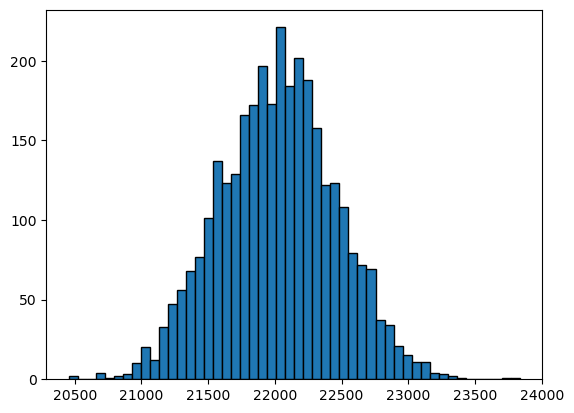

In [77]:
plt.hist(integrals, bins=50, ec = 'black')